<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/Pytorch_Project_Image_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the required packages.

# Each and every package required is explained in detail

NumPy can be used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.


tf. function is a decorator function provided by Tensorflow 2.0 that converts regular python code to a callable Tensorflow graph function, which is usually more performant and python independent. It is used to create portable Tensorflow models.

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow.

matplotlib.pyplot is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

PyTorch is a Python package that provides two high-level features:

    Tensor computation (like NumPy) with strong GPU acceleration
    Deep neural networks built on a tape-based autograd system

You can reuse your favorite Python packages such as NumPy, SciPy, and Cython to extend PyTorch when needed.



At a granular level, PyTorch is a library that consists of the following components:


torch - a Tensor library like NumPy, with strong GPU support

torch.nn - a neural networks library deeply integrated with autograd designed for maximum flexibility

torch.nn.functional - has all convulutional functions which can connect different layers




torch.optim is a package implementing various optimization algorithms. Most commonly used methods are already supported, and the interface is general enough, so that more sophisticated ones can be also easily integrated in the future.



Torchvision is a library for Computer Vision that goes hand in hand with PyTorch. It has utilities for efficient Image and Video transformations, some commonly used pre-trained models, and some datasets ( torchvision does not come bundled with PyTorch , you will have to install it separately. )

Transforms are common image transformations available in the torchvision.transforms module.

Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets.



At the heart of PyTorch data loading utility is the torch.utils.data.DataLoader class. It represents a Python iterable over a dataset, with support for

    map-style and iterable-style datasets,

    customizing data loading order,

    automatic batching,

    single- and multi-process data loading,

    automatic memory pinning.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dataset


from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

# np.random.seed() makes it possible to generate the same random numbers. Why it is used here in the sense during the training and testing it needs to pick the same data.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

# os package is to be imported since it provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc. The data we have used in this program is put in the form of a zipped file. It needs to be extracted, saved in the directory. So it is been used here



In [ ]:
import os

# This is to to mount our google drive account, so the data can be accessed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# This is to install keras so that we can use tensorflow.

# Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.

# TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# The following lines of code reads the zipped file in "read" mode and extracts the data into "tmp" folder

# Once the data is read and extracted, it has to be closed

In [ ]:
import os
import zipfile

In [ ]:
from zipfile import ZipFile

In [ ]:
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/Lungcancer.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
os.listdir('/tmp/Lung cancer')

['lung_colon_image_set']

In [ ]:
len(os.listdir('/tmp/Lung cancer/lung_colon_image_set/lung_image_sets/lung_aca'))

5000

In [ ]:
len(os.listdir('/tmp/Lung cancer/lung_colon_image_set/lung_image_sets/lung_n'))

5000

In [ ]:
len(os.listdir('/tmp/Lung cancer/lung_colon_image_set/lung_image_sets/lung_scc'))

5000

# After placing the extracted data into the temp file, convert it into a dataframe. The data type is of images is converted into rows and columns

In [ ]:
df1 = r'/tmp/Lung cancer/lung_colon_image_set/lung_image_sets'

Transforming and Augmenting the images

Transforms are common image transformations available in the torchvision.transforms module. They can be chained together using Compose.

The transformations that accept tensor images also accept batches of tensor images. A Tensor Image is a tensor with (C, H, W) shape, where C is a number of channels, H and W are image height and width. A batch of Tensor Images is a tensor of (B, C, H, W) shape, where B is a number of images in the batch.

The expected range of the values of a tensor image is implicitly defined by the tensor dtype. Tensor images with a float dtype are expected to have values in [0, 1). Tensor images with an integer dtype are expected to have values in [0, MAX_DTYPE] where MAX_DTYPE is the largest value that can be represented in that dtype.

Randomized transformations will apply the same transformation to all the images of a given batch, but they will produce different transformations across calls.



Transforms on PIL Image and torch.*Tensor

Compose(transforms)

CenterCrop(size)

ColorJitter([brightness, contrast, …])

RandomHorizontalFlip([p])

RandomRotation(degrees[, interpolation, …])

Resize(size[, interpolation, max_size, …])

ToTensor()

ColorJitter([brightness, contrast, …])


In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(),
    transforms.ToTensor()
])

# Now the extracted data is set in a generic manner where the data is arranged in a default manner

In [ ]:
data = dataset.ImageFolder('/tmp/Lung cancer/lung_colon_image_set/lung_image_sets' , transform = transform)

# Since the data are around images of 750 where 250 in lung adenocarcinoma, 250 in lung small cell cancer, 250 are benign tissue of lungs, we need to iterate the images which is in the form of tensors

# Training data is 90% and testing data is 10 %. Since the dataset is small to train the model,to avoid the underfitting of the model, it is split in this manner.

# The test data is shuffled. This means each and every time this program is executed, the test data randomly picks up the 10% of the image

In [ ]:
datalen = len(data)
dataidx = np.array(list(range(datalen)))
np.random.shuffle(dataidx)

splitfrac = 0.9
split_idx = int(splitfrac * datalen)
train_idxs = dataidx[:split_idx]
valid_idxs = dataidx[split_idx:]

testsplit = 0.1
testidxs = int(testsplit * len(train_idxs))


test_idxs = train_idxs[:testidxs]
train_idxs = train_idxs[testidxs:]

np.random.shuffle(test_idxs)

In [ ]:
batch_size = 30

In [ ]:
len(data)

15000

In [ ]:
len(data)/batch_size

500.0

# For those images, these are the labels associated with the images. So the image is fed, our model will predict the label associated with the image

In [ ]:
data.classes

['lung_aca', 'lung_n', 'lung_scc']

# Iteration of the datasets for training data and test data. 90% of training data will be iterated during training phase of the model(means repeatedly pick each and every data in the training dataset)

# 10% of the testing data will also be iterated during testing the model

In [ ]:
train_samples = torch.utils.data.SubsetRandomSampler(train_idxs)
valid_samples = torch.utils.data.SubsetRandomSampler(valid_idxs)
test_samples  = torch.utils.data.SubsetRandomSampler(test_idxs)
dataloader = DataLoader(data , batch_size = batch_size , sampler = train_samples)
validloader = DataLoader(data , batch_size = batch_size ,sampler = valid_samples)
testloader  = DataLoader(data , batch_size = batch_size , sampler = test_samples)

# To view first few images of the data in the batch and labels associated with those images these lines of code are written

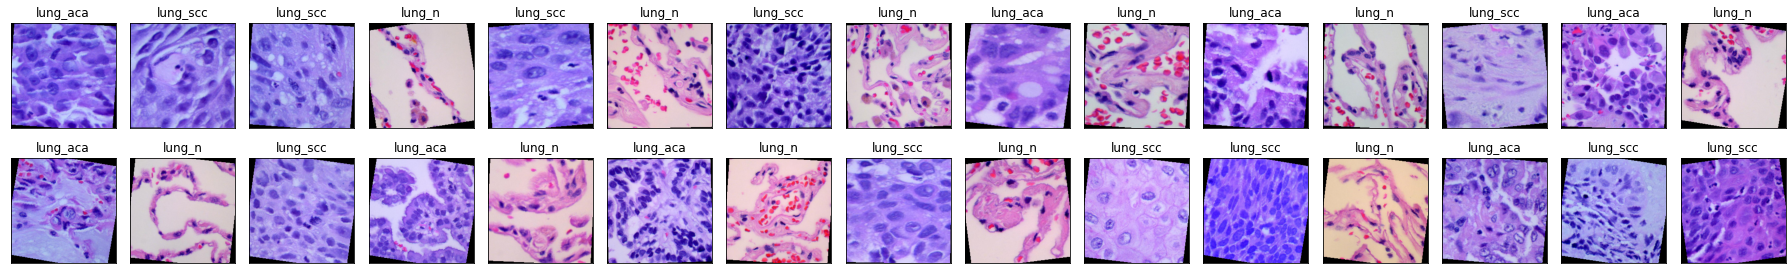

In [ ]:


images , labels = iter(dataloader).next()
images , labels = images.numpy() , labels.numpy()

fig = plt.figure(figsize = (25,4))

for i in range(batch_size):
    ax = fig.add_subplot(2 , batch_size/2 , i+1 , xticks = [] , yticks = [])
    ax.imshow(images[i].transpose(2,1,0).squeeze())
    ax.set_title(data.classes[labels[i]])

plt.tight_layout()



# This is a VGG16 CNN Architecture model which is our convolutional neural network

# This is a pretrained model so it is set as true. Pretrained means it is already used as a classification neural network. We are using the same model for our classification purpose. This is also a part of transfer learning

In [ ]:
from torchvision import models
model = models.vgg16(pretrained = True)


# Parameters -> Do not perform gradient decent -> Freeze

for param in model.parameters():
    param.no_grad_ = True

model.classifier[6] = nn.Linear(4096 , 3)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

# cuda is to keep track of the currently selected GPU, and all CUDA tensors you allocate will by default be created on that device. The selected device can be changed with a torch. cuda.

# This is a sequential model with relu activation function. Adam optimizer is used

In [ ]:
model.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:


criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters() , lr = 1e-5)



# An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches. Here we have used only 1 since the computation time is too high

# This entire model is run only on the training data

# A part of training data is also used for validation test before pushing the model for testing using the test data

In [ ]:
%timeit
n_epochs = 1

for e in range(n_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    min_valid_loss = np.inf
    model.train()
    for batch_idx , (data , target) in enumerate(dataloader):
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output , target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    for batch_idx , (data , target) in enumerate(validloader):
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output , target)
        valid_loss += loss.item()


    train_loss = train_loss / len(dataloader)
    valid_loss = valid_loss / len(validloader)
    print("Epoch : {} , Batch : {} , Loss : {}".format(e+1 , batch_idx , train_loss))

    if valid_loss < min_valid_loss:
        print("Valid Loss decreased from {} ---> {}".format(min_valid_loss , valid_loss))
        torch.save(model.state_dict() , "model_lung_canc.pt")
        min_valid_loss = valid_loss

Epoch : 1 , Batch : 49 , Loss : 0.19179163354184525
Valid Loss decreased from inf ---> 0.08716421151533722


# These lines of code gives the GPU information used in this program

In [ ]:
!nvidia-smi

Thu Jun  2 16:40:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    33W /  70W |   9588MiB / 15109MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# The loss and accuracy of the model on the test data is displayed. The following lines of code displays loss and accuracy achieved on this test data

In [ ]:
def test(loaders, model, criterion, use_cuda  = True):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [ ]:
test(testloader, model, criterion, use_cuda  = True)

Test Loss: 0.105358


Test Accuracy: 96% (1296/1350)


# The test data used for classification is displayed. Correctly classified images are in green, misclassified images are displayed in red

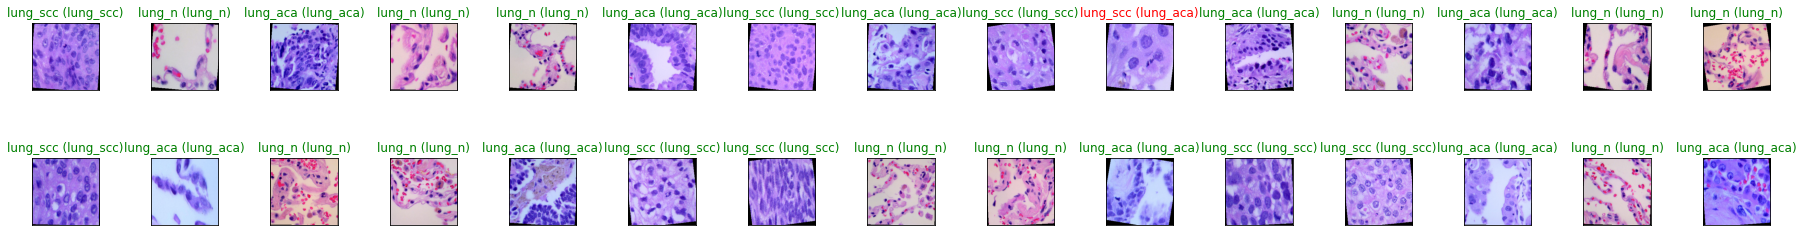

In [ ]:


dataiter = iter(testloader)
images, labels = dataiter.next()
# get predictions
preds = np.squeeze(model(images.cuda()).data.max(1, keepdim=True)[1].cpu().numpy())
images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx].transpose(1,2,0)), cmap='gray')
    ax.set_title("{} ({})".format(data.classes[preds[idx]], data.classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx] else "red"))
plt.tight_layout()

